# Laboratorio 3: Deep Learning

#### Mario de León 19019
#### Javier Valle 20159

### Imports necesarios

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## Ejercicio 1

## Inciso 1: haciendo análisis exploratorio. Para el análisis exploratorio usar test. Para lo demás se puede usar train.

In [2]:
# Abriendo el csv.

data = pd.read_csv("test.csv")

data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filtrando la data

In [3]:
# Filtrar las columnas de píxeles entre 0 y 783
pixel_columns = [f"pixel{i}" for i in range(784)]  # Columnas de pixel0 a pixel783
filtered_data = data[pixel_columns]

#filtered_data

# Resumen estadístico
print(filtered_data.describe())

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  \
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776   
count  28000.0  28000.0  ...  28000.000000  28000.000000  28000.000000  \
mean       0.0      0.0  ...      0.164607      0.073214      0.028036   
std        0.0      0.0  ...      5.473293      

#### Haciendo un histograma de los datos.

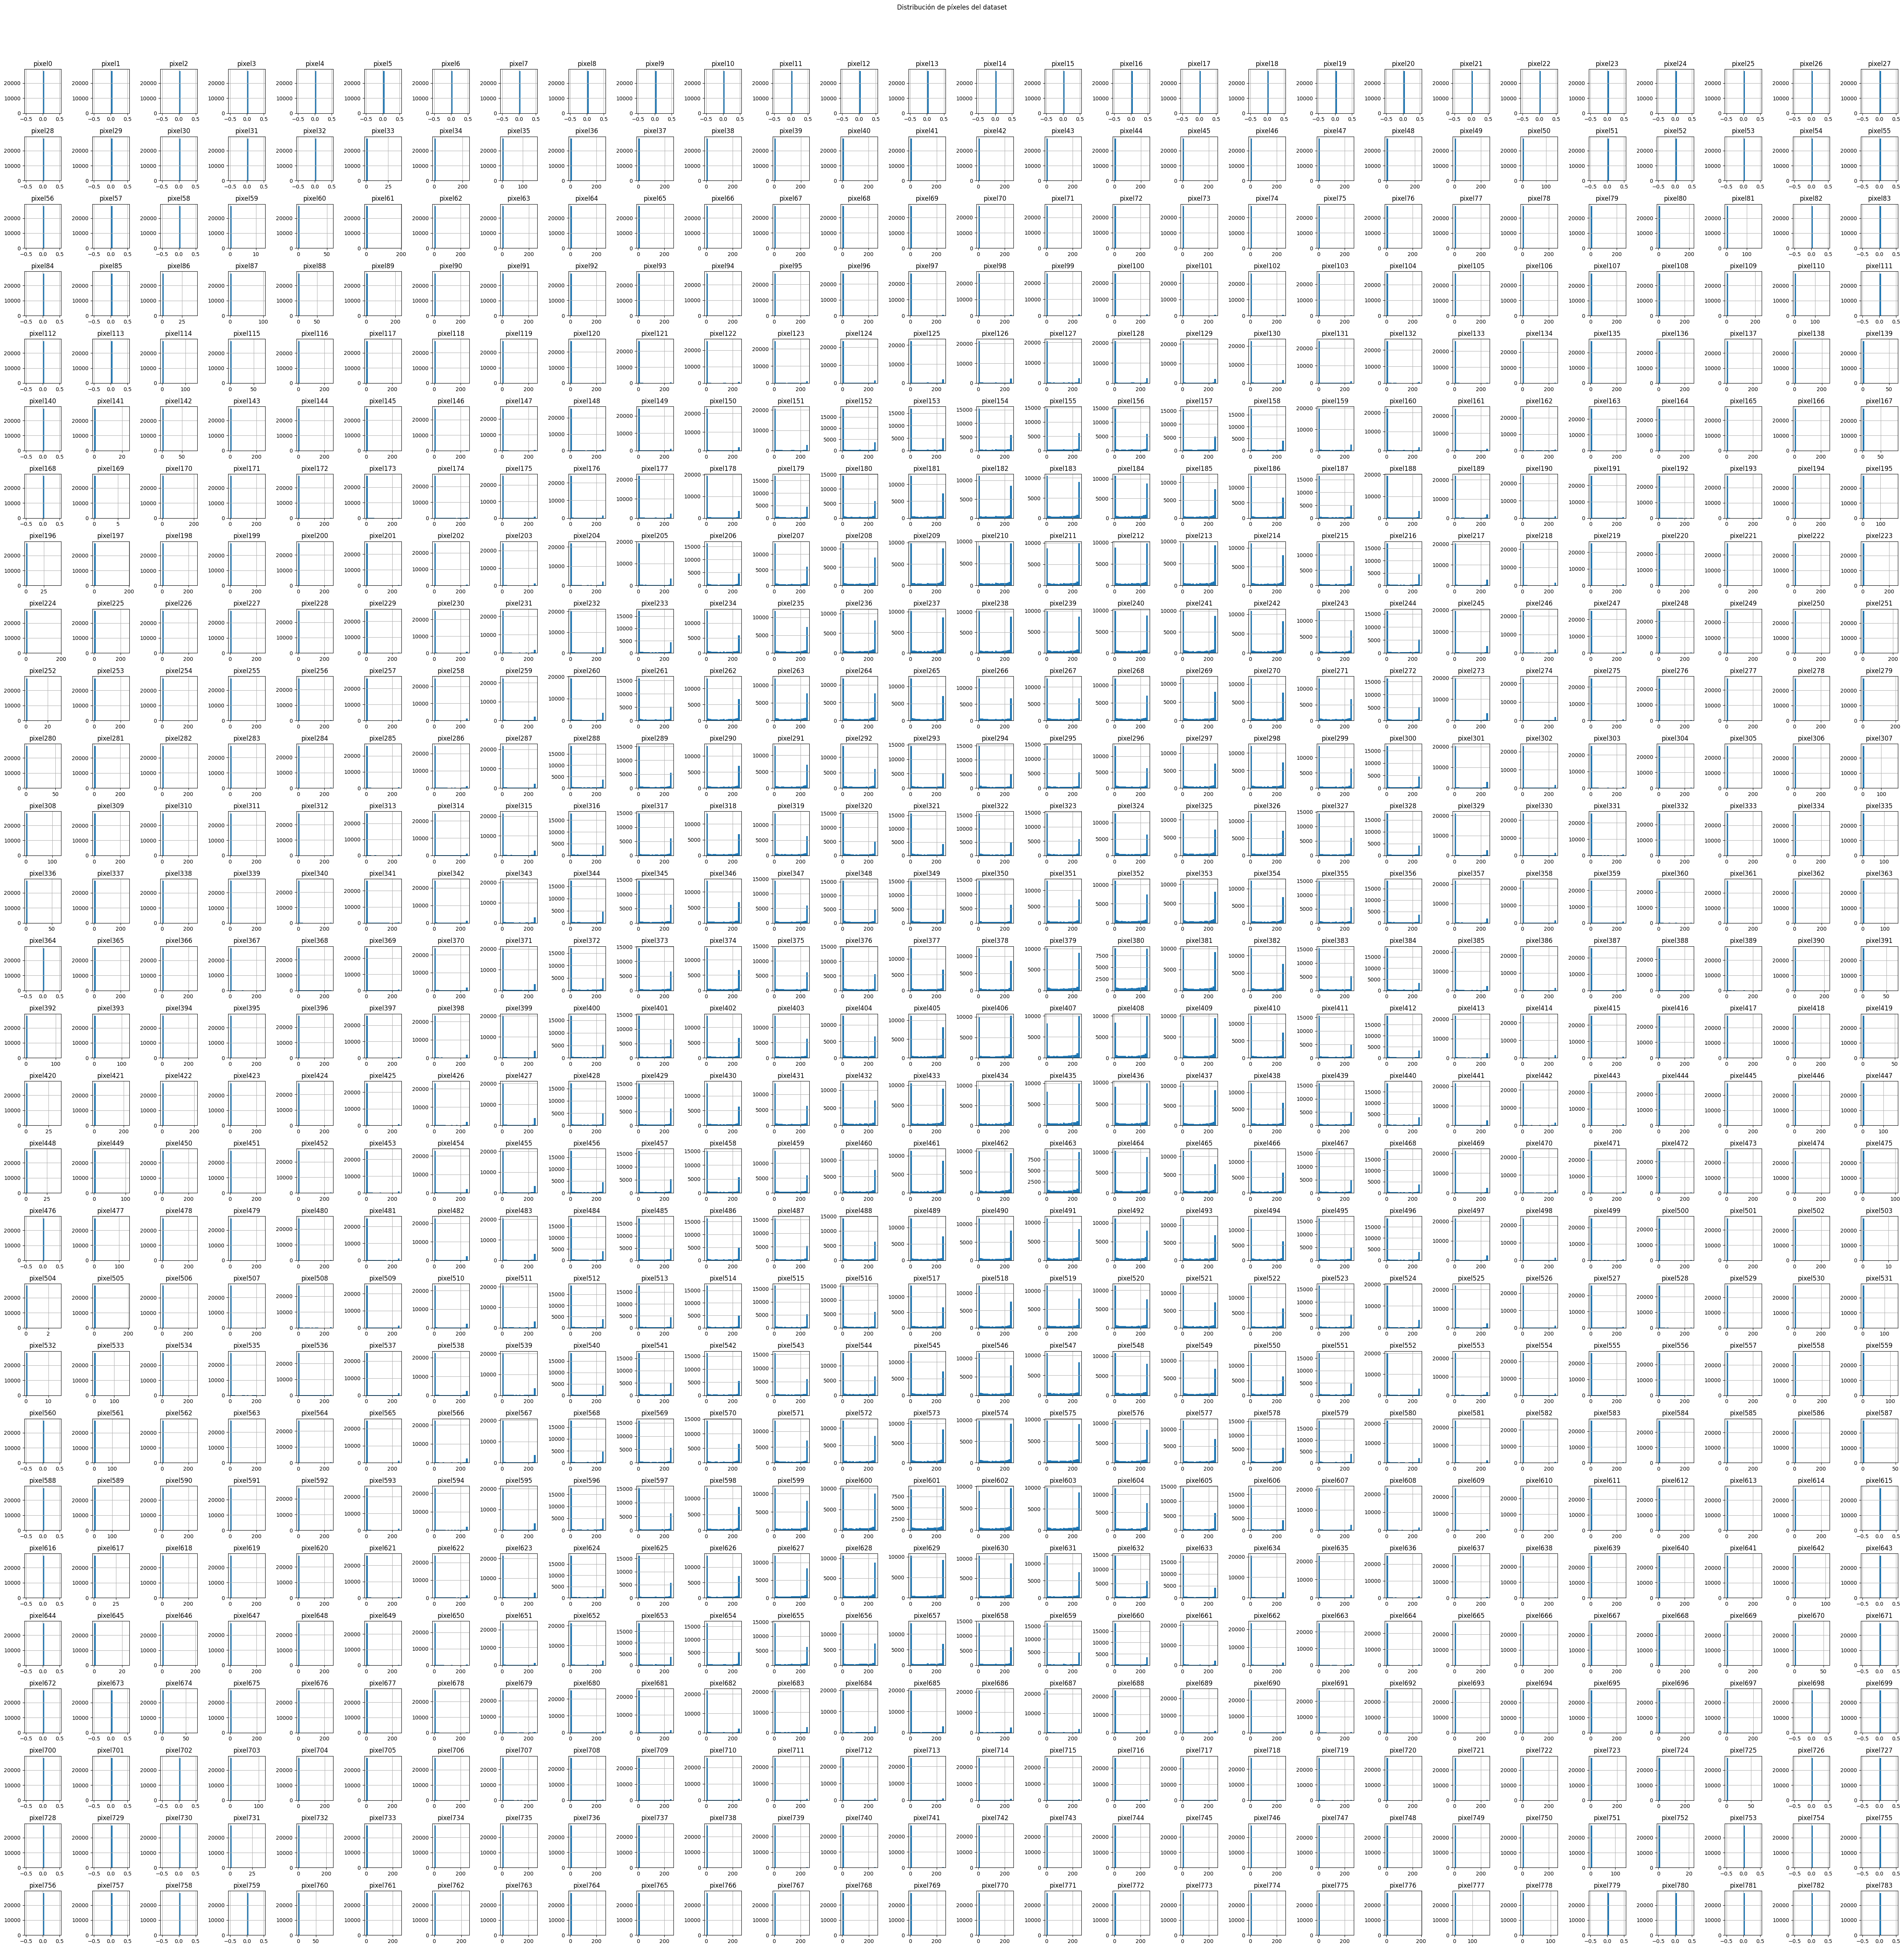

In [4]:
# Histogramas
filtered_data.hist(bins=20, figsize=(50, 50))
plt.suptitle("Distribución de píxeles del dataset", y=1.02)
plt.tight_layout()
plt.show()

##### Haciendo una matriz de correlación entre los datos.

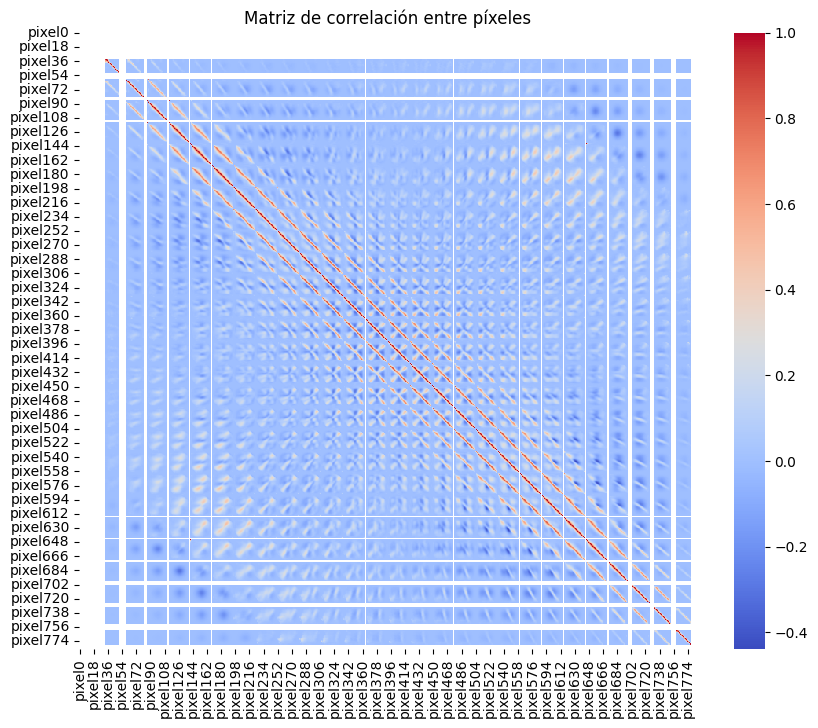

In [5]:
# Matriz de correlación
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True, annot=False)
plt.title("Matriz de correlación entre píxeles")
plt.show()

#### Haciendo diegrama de dispersión.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:116: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[

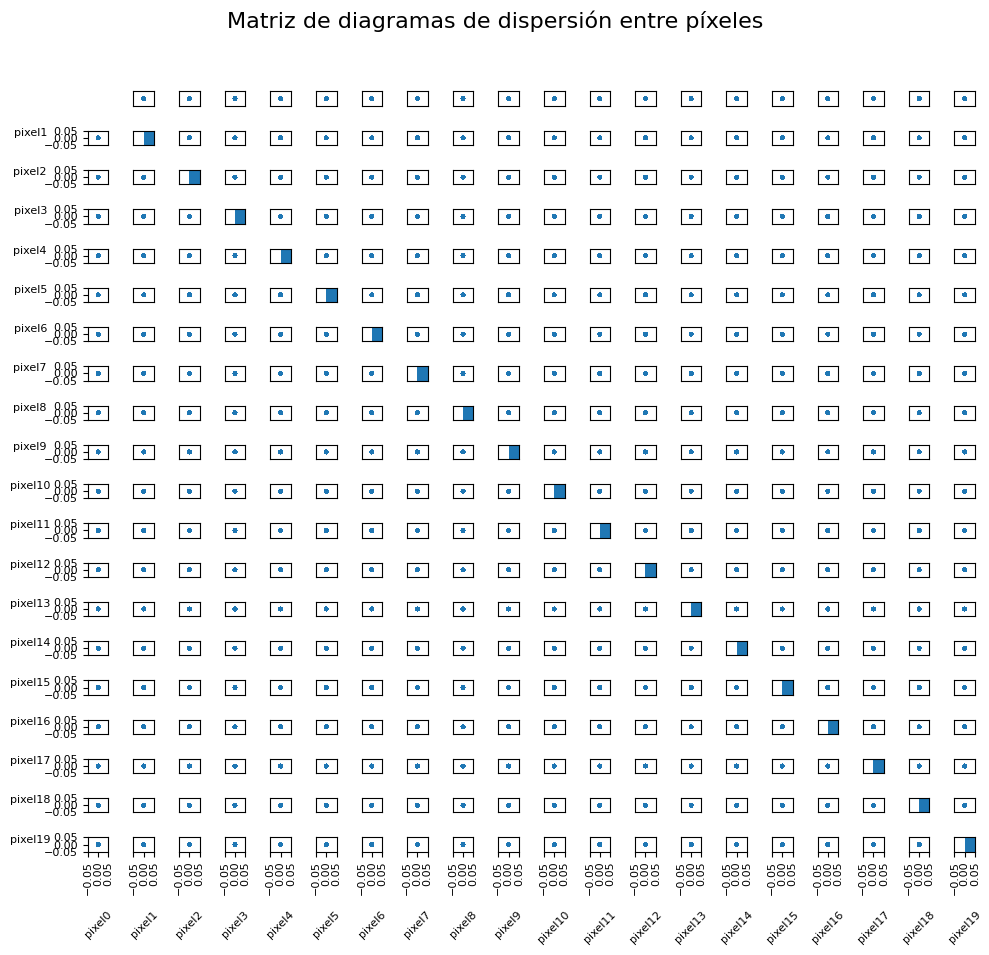

In [6]:
num_columns = 20  # Seleccionando nada más 20 columnas.
pixel_columns = [f"pixel{i}" for i in range(num_columns)]

# Crear una matriz de diagramas de dispersión
scatter_matrix = pd.plotting.scatter_matrix(data[pixel_columns], alpha=0.2, figsize=(10, 10), diagonal='hist')

# Ajustar las etiquetas en la diagonal
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10

plt.suptitle("Matriz de diagramas de dispersión entre píxeles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Hacinedo un análisis de frecuencia al dataset.

<Figure size 1500x600 with 0 Axes>

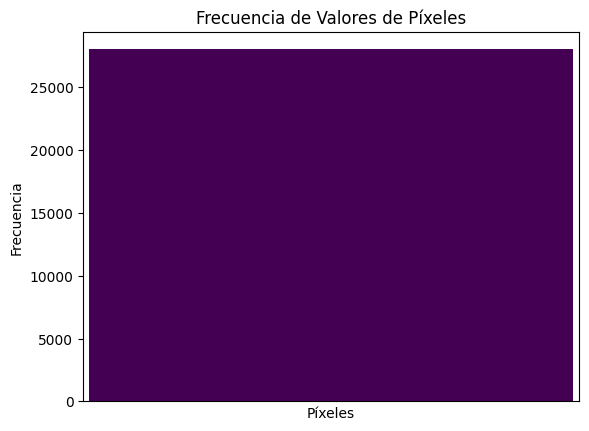

In [7]:
# Creando la frecuencia de ocurrencia de las columnas de los pixeles.

# Creando una lista que guarda los nombres de los pixeles.
pixel_columns = [f"pixel{i}" for i in range(20)]

# Calculando la frecuencia de ocurrencia de cada valor de píxel
pixel_frequencies = data[pixel_columns].apply(pd.Series.value_counts).fillna(0)

# Graficando las frecuencias de los valores de píxeles
plt.figure(figsize=(15, 6))
pixel_frequencies.T.plot(kind="bar", stacked=True, colormap="viridis", width=1)
plt.title("Frecuencia de Valores de Píxeles")
plt.xlabel("Píxeles")
plt.ylabel("Frecuencia")
plt.xticks([])
plt.legend().set_visible(False)
plt.show()

### Dividiendo los datos en entrenamiento y prueba

In [12]:
# Crear una lista de nombres de columnas de píxeles
pixel_columns = [f"pixel{i}" for i in range(784)]

# Dividir el dataset en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de datos
print("Conjunto de entrenamiento:", train_data.shape)
print("Conjunto de prueba:", test_data.shape)

Conjunto de entrenamiento: (22400, 784)
Conjunto de prueba: (5600, 784)


## Inciso 2: Creando un modelo simple de redes neuronales.

Epoch 1/10
840/840 [==============================] - 10s 9ms/step - loss: 0.3085 - accuracy: 0.9093 - val_loss: 0.1884 - val_accuracy: 0.9504
Epoch 2/10
840/840 [==============================] - 7s 8ms/step - loss: 0.1124 - accuracy: 0.9651 - val_loss: 0.1622 - val_accuracy: 0.9582
Epoch 3/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0725 - accuracy: 0.9764 - val_loss: 0.1889 - val_accuracy: 0.9594
Epoch 4/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.1891 - val_accuracy: 0.9564
Epoch 5/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0417 - accuracy: 0.9853 - val_loss: 0.2084 - val_accuracy: 0.9561
Epoch 6/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.2072 - val_accuracy: 0.9580
Epoch 7/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 0.2299 - val_accuracy: 0.9615
Epoch

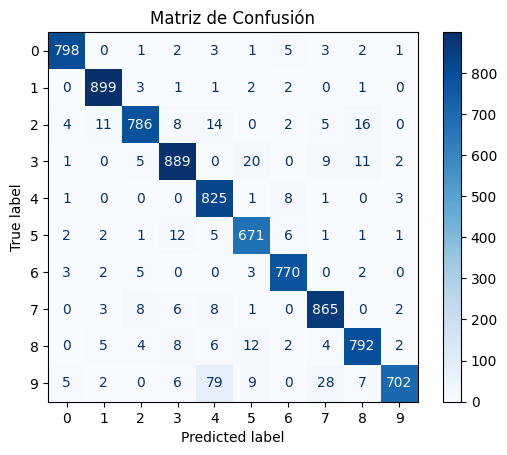

In [37]:
data = pd.read_csv("train.csv")

# Separando las características (píxeles) y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Obteniendo los datos del entrenamiento/prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluando el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Inciso 3: Haciendo un modelo de deep learning.

Epoch 1/10
840/840 [==============================] - 10s 9ms/step - loss: 0.4645 - accuracy: 0.8656 - val_loss: 0.2026 - val_accuracy: 0.9405
Epoch 2/10
840/840 [==============================] - 7s 9ms/step - loss: 0.2367 - accuracy: 0.9291 - val_loss: 0.1825 - val_accuracy: 0.9537
Epoch 3/10
840/840 [==============================] - 8s 9ms/step - loss: 0.1815 - accuracy: 0.9451 - val_loss: 0.1708 - val_accuracy: 0.9560
Epoch 4/10
840/840 [==============================] - 7s 9ms/step - loss: 0.1558 - accuracy: 0.9513 - val_loss: 0.1654 - val_accuracy: 0.9588
Epoch 5/10
840/840 [==============================] - 7s 8ms/step - loss: 0.1440 - accuracy: 0.9538 - val_loss: 0.1783 - val_accuracy: 0.9629
Epoch 6/10
840/840 [==============================] - 7s 9ms/step - loss: 0.1237 - accuracy: 0.9600 - val_loss: 0.1598 - val_accuracy: 0.9631
Epoch 7/10
840/840 [==============================] - 7s 9ms/step - loss: 0.1110 - accuracy: 0.9641 - val_loss: 0.1831 - val_accuracy: 0.9647
Epoch

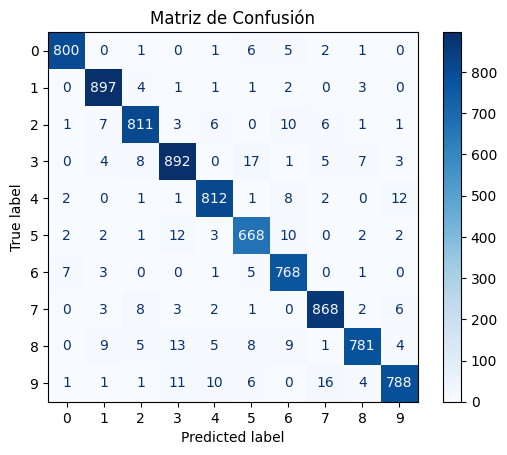

In [39]:
data = pd.read_csv("train.csv")

X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Dividiendo el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la red neuronal profunda
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Inciso 4: Haciendo un modelo con otro algoritmo.

In [40]:
data = pd.read_csv("train.csv")

# Separando características (píxeles) y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Dividiendo el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creando el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenando el modelo
rf_model.fit(X_train_scaled, y_train)

# Evaluando el modelo en el conjunto de prueba
accuracy = rf_model.score(X_test_scaled, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Inciso 5: Pruebe el mejor modelo ingresando imágenes de dígitos hechos a mano por los integrantes del grupo. Discuta el desempeño de su modelo y los resultados. 

Epoch 1/10
560/560 [==============================] - 8s 9ms/step - loss: 0.0233 - accuracy: 0.9949 - val_loss: 9.4442e-05 - val_accuracy: 1.0000
Epoch 2/10
560/560 [==============================] - 5s 8ms/step - loss: 4.7177e-05 - accuracy: 1.0000 - val_loss: 3.1222e-05 - val_accuracy: 1.0000
Epoch 3/10
560/560 [==============================] - 5s 9ms/step - loss: 1.8014e-05 - accuracy: 1.0000 - val_loss: 1.4837e-05 - val_accuracy: 1.0000
Epoch 4/10
560/560 [==============================] - 5s 8ms/step - loss: 9.0408e-06 - accuracy: 1.0000 - val_loss: 8.3080e-06 - val_accuracy: 1.0000
Epoch 5/10
560/560 [==============================] - 5s 8ms/step - loss: 5.1721e-06 - accuracy: 1.0000 - val_loss: 5.1007e-06 - val_accuracy: 1.0000
Epoch 6/10
560/560 [==============================] - 4s 8ms/step - loss: 3.1859e-06 - accuracy: 1.0000 - val_loss: 3.3078e-06 - val_accuracy: 1.0000
Epoch 7/10
560/560 [==============================] - 5s 9ms/step - loss: 2.0559e-06 - accuracy: 1.0000 

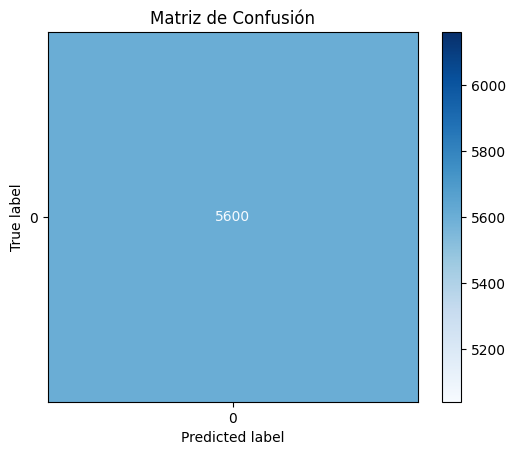

In [ ]:
data = pd.read_csv("train.csv")

# Separando las características (píxeles) y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Obteniendo los datos del entrenamiento/prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluando el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

##### 